<a href="https://colab.research.google.com/github/FabiFoc/Small-Project-/blob/main/SmallProject_FirstDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q scikit-learn tensorflow pandas numpy matplotlib tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, ConfusionMatrixDisplay, roc_curve, auc
)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam



In [3]:
train = pd.read_csv('/content/Train_data.csv')
test = pd.read_csv('/content/Test_data.csv')

print("\nTrain head:")
display(train.head())

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTrain columns:")
print(train.columns)



Train head:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Train shape: (25192, 42)
Test shape: (22544, 41)

Train columns:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [4]:
# Encoding
for col in ['protocol_type', 'service', 'flag', 'class']:
    train[col] = train[col].astype('category').cat.codes

# Separate features and target
array = train.values
X = array[:, 0:41]
y = np.array([(1 - x) for x in array[:, 41]]).astype(int)

# Standardization
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42
)

print(X_train.shape, X_test.shape)


(16878, 41) (8314, 41)


In [4]:
print("Sample of encoded categorical columns:")
print(train[['protocol_type','service','flag','class']].head())

print("\nUnique values of target y:")
print(np.unique(y))

print("\nMean of scaled features (rounded):")
print(X_scaled.mean(axis=0).round(2))

print("\nStd of scaled features (rounded):")
print(X_scaled.std(axis=0).round(2))


Sample of encoded categorical columns:
   protocol_type  service  flag  class
0              1       19     9      1
1              2       41     9      1
2              1       46     5      0
3              1       22     9      1
4              1       22     9      1

Unique values of target y:
[0 1]

Mean of scaled features (rounded):
[ 0.  0.  0. -0.  0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.
  0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0.
  0. -0. -0.  0.  0.]

Std of scaled features (rounded):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
#Logistic Regression Model
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)

logreg = LogisticRegression(max_iter=10000)
clf_log = GridSearchCV(logreg, params, cv=5, n_jobs=-1)
clf_log.fit(X_train, y_train)

# Predictions and metrics
y_pred_log = clf_log.predict(X_test)
y_proba_log = clf_log.predict_proba(X_test)


In [6]:
#K-NN Model
errors, losses = [], []
best_k, best_acc = None, -1

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc, best_k = acc, k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)


In [7]:
#SVM Model
fs = SelectKBest(score_func=mutual_info_classif, k=30)
fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

clf_svm = svm.SVC(kernel='sigmoid', coef0=0, probability=True)
clf_svm.fit(X_train_fs, y_train)

y_pred_svm = clf_svm.predict(X_test_fs)
y_proba_svm = clf_svm.predict_proba(X_test_fs)



In [8]:
# ANN Model
# With Early Stopping, Learning Rate Scheduler,
# Basic Hyperparameter Tuning and Reproducibility
import tensorflow as tf

# Ensuring reproducibility
tf.random.set_seed(42)

# Number of input features
n_features = X_train.shape[1]

# Model Architecture
# - BatchNormalization stabilizes training and accelerates convergence.
# - Dropout reduces overfitting.
# - Two hidden layers (32 and 16 units) provide enough capacity
#   without overfitting excessively.

model = Sequential([
    Dense(32, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary classification output
])

# Optimizer

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
# EarlyStopping:
#   - Stops training when validation loss stops improving.
#   - Restores the best weights.
# ReduceLROnPlateau:
#   - Reduces the learning rate when validation loss stagnates.
#   - Helps the model converge more smoothly.

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Training
# validation_split=0.2 creates a validation set automatically.
# verbose=1 prints training progress.

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Predictions
# proba_ann: predicted probabilities
# pred: binary predictions using threshold 0.5

proba_ann = model.predict(X_test).ravel()
pred = (proba_ann > 0.5).astype(int)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8767 - loss: 0.3055 - val_accuracy: 0.9630 - val_loss: 0.1074 - learning_rate: 0.0010
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9601 - loss: 0.1208 - val_accuracy: 0.9713 - val_loss: 0.0810 - learning_rate: 0.0010
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.0884 - val_accuracy: 0.9772 - val_loss: 0.0689 - learning_rate: 0.0010
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0756 - val_accuracy: 0.9799 - val_loss: 0.0591 - learning_rate: 0.0010
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9769 - loss: 0.0666 - val_accuracy: 0.9828 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9786 - loss: 0.0635 - val_accuracy: 0.9831 - val_loss: 0.0536 - learning_rate: 0.0010
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0

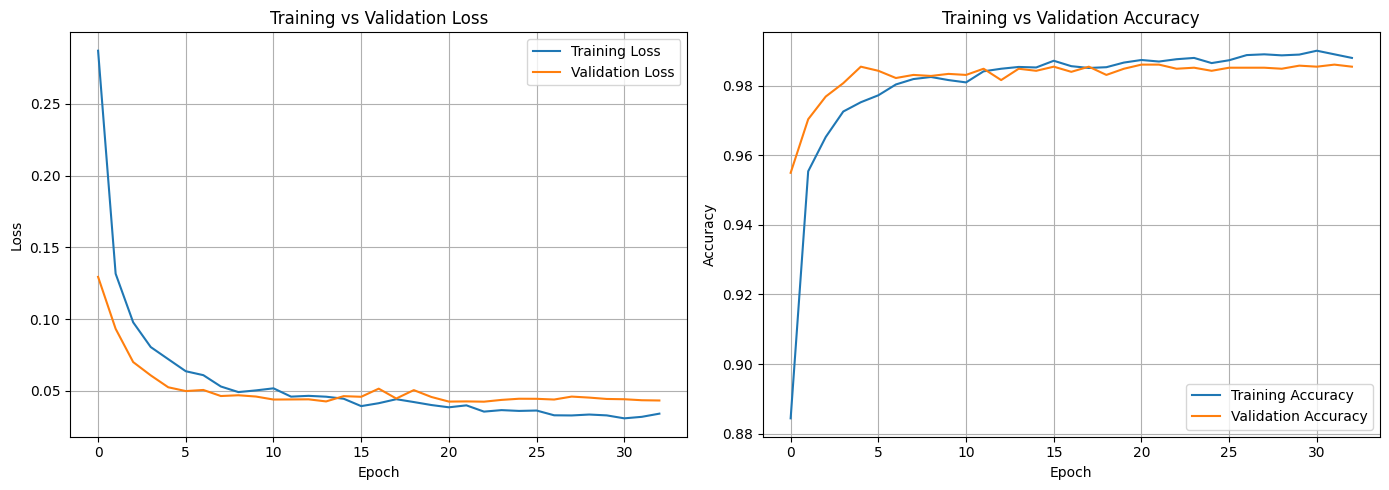

In [13]:

plt.figure(figsize=(14, 5))

# Subplot 1: Loss

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot 2: Accuracy

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
#Decision Tree Model
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_split=20,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)


In [10]:
#Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)



In [21]:
metrics_dict = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Precision": precision_score(y_test, y_pred_log),
        "Recall": recall_score(y_test, y_pred_log),
        "F1": f1_score(y_test, y_pred_log),
        "ROC-AUC": roc_auc_score(y_test, y_proba_log[:,1]),
        "Log-loss": log_loss(y_test, y_proba_log)
    },
    "k-NN": {
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "F1": f1_score(y_test, y_pred_knn),
        "ROC-AUC": roc_auc_score(y_test, y_proba_knn[:,1]),
        "Log-loss": log_loss(y_test, y_proba_knn)
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_svm),
        "Precision": precision_score(y_test, y_pred_svm),
        "Recall": recall_score(y_test, y_pred_svm),
        "F1": f1_score(y_test, y_pred_svm),
        "ROC-AUC": roc_auc_score(y_test, y_proba_svm[:,1]),
        "Log-loss": log_loss(y_test, y_proba_svm)
    },
    "ANN": {
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1": f1_score(y_test, pred),
        "ROC-AUC": roc_auc_score(y_test, proba_ann),
        "Log-loss": log_loss(y_test, proba_ann)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt),
        "Recall": recall_score(y_test, y_pred_dt),
        "F1": f1_score(y_test, y_pred_dt),
        "ROC-AUC": roc_auc_score(y_test, y_proba_dt[:,1]),
        "Log-loss": log_loss(y_test, y_proba_dt)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1": f1_score(y_test, y_pred_rf),
        "ROC-AUC": roc_auc_score(y_test, y_proba_rf[:,1]),
        "Log-loss": log_loss(y_test, y_proba_rf)
    }
}


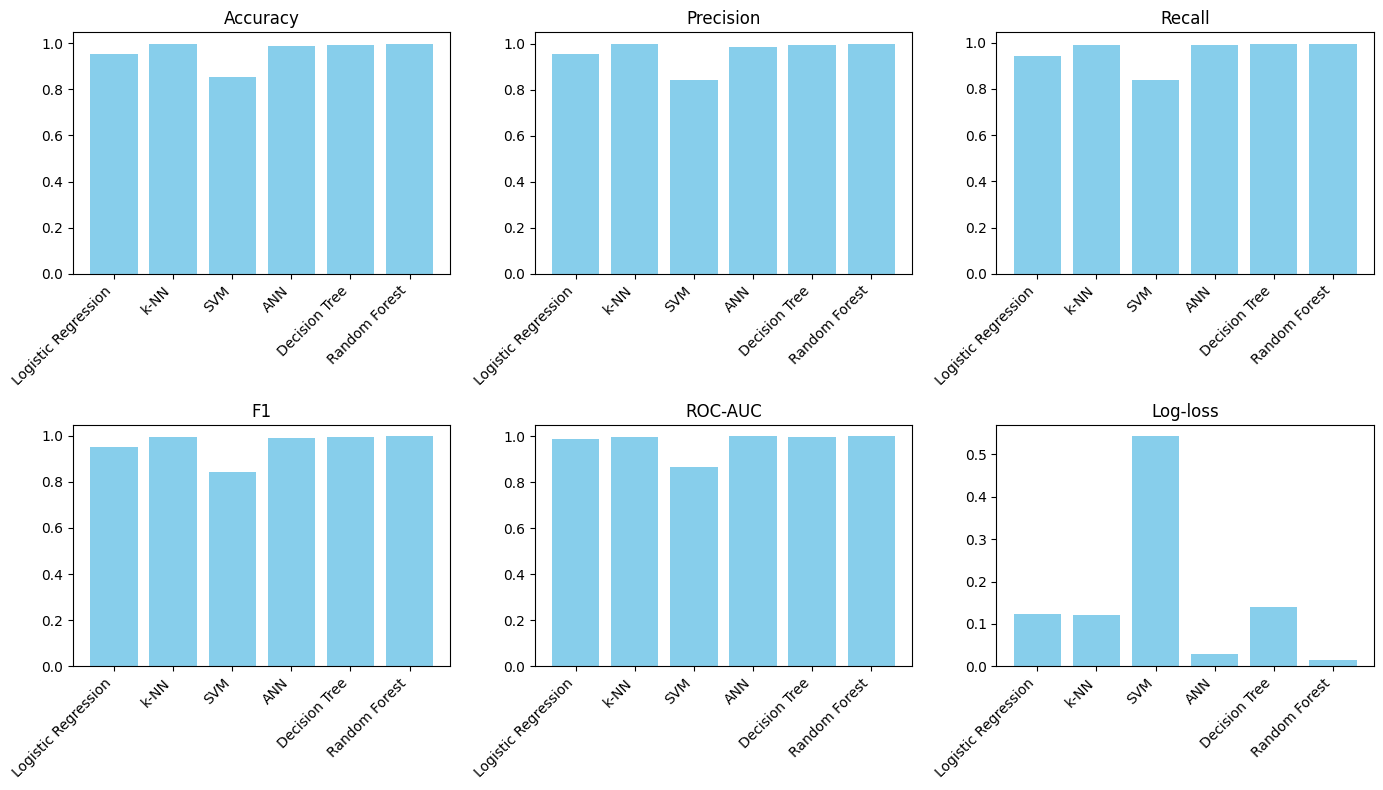

In [22]:
models = list(metrics_dict.keys())
metric_names = list(metrics_dict["Logistic Regression"].keys())

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metric_names):
    plt.subplot(2, 3, i+1)
    values = [metrics_dict[m][metric] for m in models]
    plt.bar(models, values, color='skyblue')
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


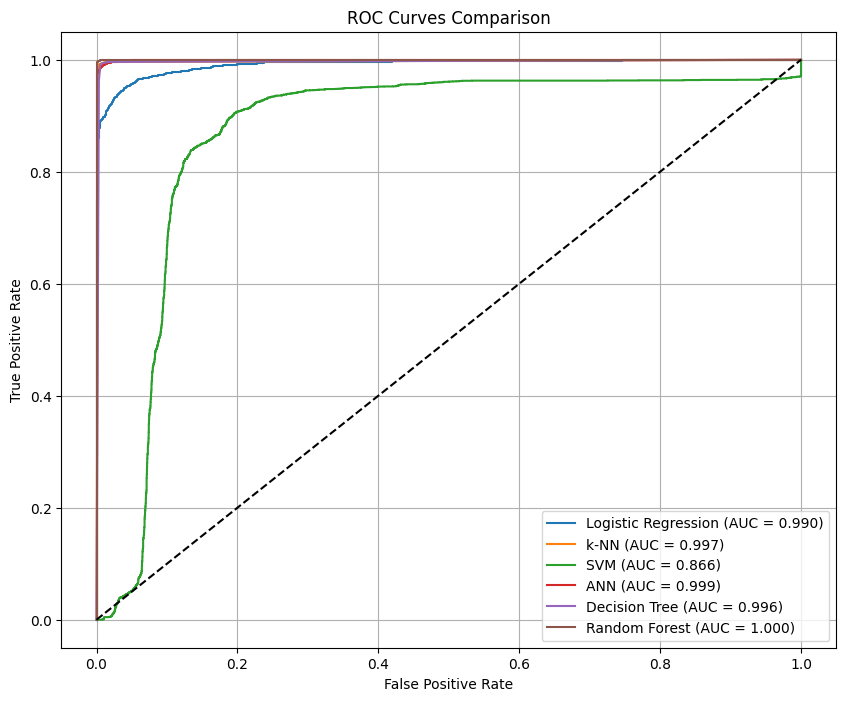

In [23]:
plt.figure(figsize=(10, 8))

def plot_roc(y_test, y_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.3f})")

plot_roc(y_test, y_proba_log[:,1], "Logistic Regression")
plot_roc(y_test, y_proba_knn[:,1], "k-NN")
plot_roc(y_test, y_proba_svm[:,1], "SVM")
plot_roc(y_test, proba_ann, "ANN")
plot_roc(y_test, y_proba_dt[:,1], "Decision Tree")
plot_roc(y_test, y_proba_rf[:,1], "Random Forest")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()


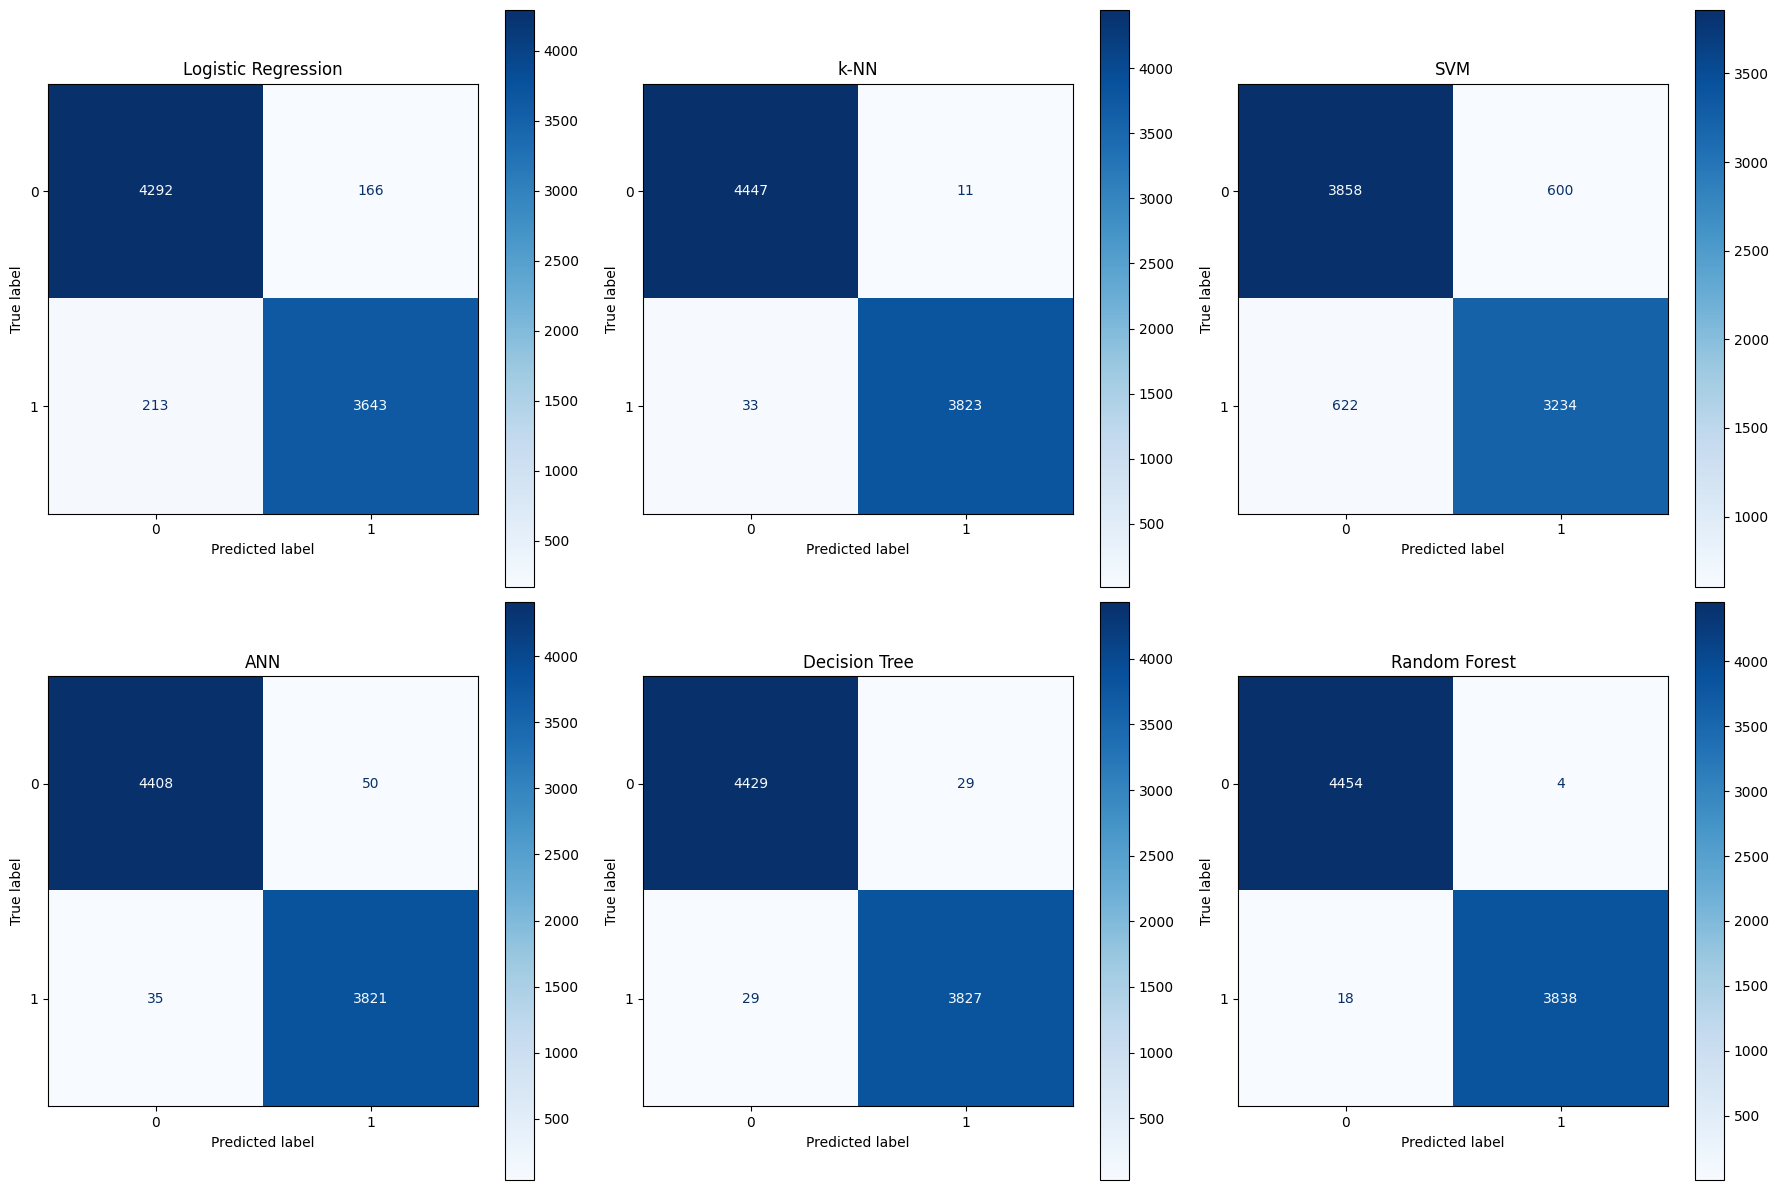

In [24]:
models_preds = {
    "Logistic Regression": y_pred_log,
    "k-NN": y_pred_knn,
    "SVM": y_pred_svm,
    "ANN": pred,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, (name, preds) in zip(axes.flatten(), models_preds.items()):
    ConfusionMatrixDisplay.from_predictions(
        y_test, preds, cmap='Blues', values_format='d', ax=ax
    )
    ax.set_title(name)

plt.tight_layout()
plt.show()


In [15]:
!pip install permetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.2 MB/s eta 0:00:00


In [17]:
# CLUSTERING (K-MEANS) + VALIDITY INDICES
# (scikit-learn + permetrics per il Dunn Index)


from sklearn.cluster import KMeans
from sklearn.metrics import (
    rand_score, jaccard_score, fowlkes_mallows_score,
    silhouette_score, davies_bouldin_score, calinski_harabasz_score
)
from permetrics import ClusteringMetric

print("=== K-MEANS CLUSTERING ===")

# Fit K-Means with 2 clusters (normal vs attack)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

print("Clustering completed.")

# EXTERNAL VALIDITY METRICS (scikit-learn)

RI  = rand_score(y, cluster_labels)
FMI = fowlkes_mallows_score(y, cluster_labels)
JI  = jaccard_score(y, cluster_labels)

# INTERNAL VALIDITY METRICS (scikit-learn)

SI  = silhouette_score(X_scaled, cluster_labels)
DBI = davies_bouldin_score(X_scaled, cluster_labels)
CHI = calinski_harabasz_score(X_scaled, cluster_labels)

# DUNN INDEX (permetrics)

cm = ClusteringMetric(X=X_scaled, y_pred=cluster_labels)
DI = cm.dunn_index()

# PRINT RESULTS

print("\n=== External Validity Metrics ===")
print(f"Rand Index (RI): {RI:.6f}")
print(f"Fowlkes-Mallows Index (FMI): {FMI:.6f}")
print(f"Jaccard Index (JI): {JI:.6f}")

print("\n=== Internal Validity Metrics ===")
print(f"Silhouette Index (SI): {SI:.6f}")
print(f"Davies-Bouldin Index (DBI): {DBI:.6f}")
print(f"Calinski-Harabasz Index (CHI): {CHI:.6f}")

print("\n=== Dunn Index ===")
print(f"Dunn Index (DI): {DI:.6f}")



=== K-MEANS CLUSTERING ===
Clustering completed.

=== External Validity Metrics ===
Rand Index (RI): 0.827994
Fowlkes-Mallows Index (FMI): 0.833381
Jaccard Index (JI): 0.798230

=== Internal Validity Metrics ===
Silhouette Index (SI): 0.350746
Davies-Bouldin Index (DBI): 1.438761
Calinski-Harabasz Index (CHI): 5504.372513

=== Dunn Index ===
Dunn Index (DI): 0.022624


In [18]:
# Summary Table of Clustering Metrics

clustering_metrics = {
    "Rand Index (RI)": RI,
    "Fowlkes-Mallows (FMI)": FMI,
    "Jaccard Index (JI)": JI,
    "Silhouette Index (SI)": SI,
    "Davies-Bouldin (DBI)": DBI,
    "Calinski-Harabasz (CHI)": CHI,
    "Dunn Index (DI)": DI
}
print("\n=== Clustering Metrics Summary ===")
display(pd.DataFrame.from_dict(clustering_metrics, orient='index', columns=['Value']))



=== Clustering Metrics Summary ===


,Value
Rand Index (RI),0.827994
Fowlkes-Mallows (FMI),0.833381
Jaccard Index (JI),0.798230
Silhouette Index (SI),0.350746
Davies-Bouldin (DBI),1.438761
Calinski-Harabasz (CHI),5504.372513
Dunn Index (DI),0.022624


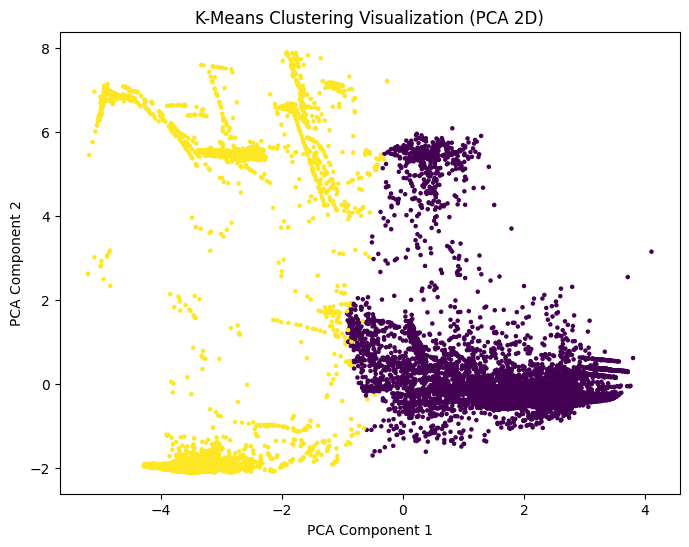

In [19]:
# PCA Visualization of Clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='viridis', s=5)
plt.title("K-Means Clustering Visualization (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
#The PCA visualization provides an intuitive two‑dimensional representation of the clustering structure,
# but it captures only a limited portion of the total variance of the original 41‑dimensional dataset.
# As a result, the clusters may appear more clearly separated in the PCA plot than they actually are in the full feature space,
# where quantitative metrics such as the Dunn Index reveal a much higher degree of overlap.


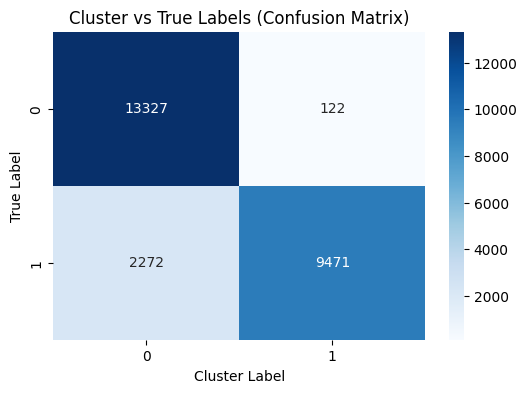

In [20]:
# Heatmap: Cluster vs True Labels

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix between cluster labels and true labels
cm = confusion_matrix(y, cluster_labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster vs True Labels (Confusion Matrix)")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
#The heatmap comparing cluster assignments with the true labels highlights how well the unsupervised K‑Means clusters correspond to the actual classes.
# High values along the diagonal indicate that the clustering aligns with the real categories,
# while off‑diagonal values reveal misclassifications or overlapping regions between normal traffic and attacks.

Completed size 10%
Completed size 20%
Completed size 30%
Completed size 40%
Completed size 50%
Completed size 60%
Completed size 70%
Completed size 80%
Completed size 90%
Completed size 100%


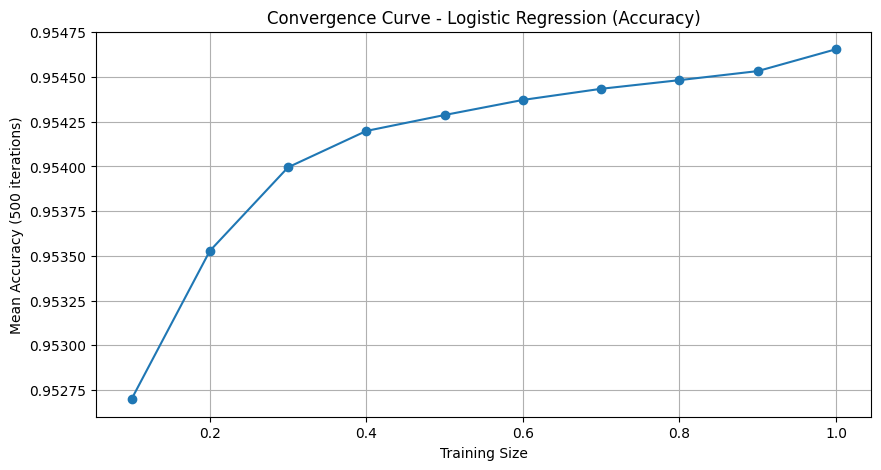

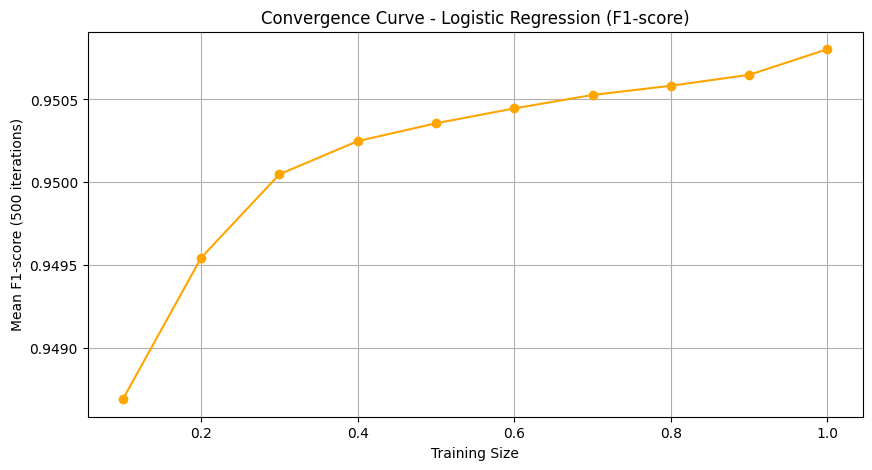

In [11]:
#Convergence Experiment on Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Training sizes

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
iterations = 500

# Dictionaries to store metrics

accuracy_results = {size: [] for size in training_sizes}
f1_results = {size: [] for size in training_sizes}


# Loop of 500 iterations

for size in training_sizes:
    subset_len = int(size * len(X_train))

    for i in range(iterations):
        # Estrazione subset casuale
        indices = np.random.choice(len(X_train), subset_len, replace=False)
        X_sub = X_train[indices]
        y_sub = y_train[indices]

        # Modello
        model = LogisticRegression(max_iter=2000, solver='liblinear')
        model.fit(X_sub, y_sub)

        # Predizioni
        y_pred = model.predict(X_test)

        # Metriche
        accuracy_results[size].append(accuracy_score(y_test, y_pred))
        f1_results[size].append(f1_score(y_test, y_pred))

    print(f"Completed size {int(size*100)}%")

# Calculation of the averages

accuracy_mean = {size: np.mean(values) for size, values in accuracy_results.items()}
f1_mean = {size: np.mean(values) for size, values in f1_results.items()}


# Final plots

plt.figure(figsize=(10, 5))
plt.plot(training_sizes, list(accuracy_mean.values()), marker='o')
plt.xlabel("Training Size")
plt.ylabel("Mean Accuracy (500 iterations)")
plt.title("Convergence Curve - Logistic Regression (Accuracy)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(training_sizes, list(f1_mean.values()), marker='o', color='orange')
plt.xlabel("Training Size")
plt.ylabel("Mean F1-score (500 iterations)")
plt.title("Convergence Curve - Logistic Regression (F1-score)")
plt.grid(True)
plt.show()


In [5]:
#Start of Convergence experiment on all models
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def run_model(model, model_name, X_train, y_train, X_test, y_test, training_sizes, iterations=500):
    print(f"\n=== Running model: {model_name} ===")

    accuracy_results = {size: [] for size in training_sizes}
    f1_results = {size: [] for size in training_sizes}

    for size in training_sizes:
        subset_len = int(size * len(X_train))

        for i in range(iterations):
            if i % 50 == 0:
                print(f"{model_name} - size {int(size*100)}% - iter {i}")

            idx = np.random.choice(len(X_train), subset_len, replace=False)
            X_sub = X_train[idx]
            y_sub = y_train[idx]

            model.fit(X_sub, y_sub)
            y_pred = model.predict(X_test)

            accuracy_results[size].append(accuracy_score(y_test, y_pred))
            f1_results[size].append(f1_score(y_test, y_pred))

        print(f"Completed size {int(size*100)}%")

    accuracy_mean = {size: np.mean(vals) for size, vals in accuracy_results.items()}
    f1_mean = {size: np.mean(vals) for size, vals in f1_results.items()}

    print(f"=== Completed model: {model_name} ===")
    return accuracy_mean, f1_mean


In [6]:
training_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

results_accuracy = {}
results_f1 = {}


In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, solver='liblinear')

accuracy_logreg, f1_logreg = run_model(
    log_reg,
    "Logistic Regression",
    X_train, y_train,
    X_test, y_test,
    training_sizes
)

results_accuracy["Logistic Regression"] = accuracy_logreg
results_f1["Logistic Regression"] = f1_logreg



=== Running model: Logistic Regression ===
Logistic Regression - size 10% - iter 0
Logistic Regression - size 10% - iter 50
Logistic Regression - size 10% - iter 100
Logistic Regression - size 10% - iter 150
Logistic Regression - size 10% - iter 200
Logistic Regression - size 10% - iter 250
Logistic Regression - size 10% - iter 300
Logistic Regression - size 10% - iter 350
Logistic Regression - size 10% - iter 400
Logistic Regression - size 10% - iter 450
Completed size 10%
Logistic Regression - size 20% - iter 0
Logistic Regression - size 20% - iter 50
Logistic Regression - size 20% - iter 100
Logistic Regression - size 20% - iter 150
Logistic Regression - size 20% - iter 200
Logistic Regression - size 20% - iter 250
Logistic Regression - size 20% - iter 300
Logistic Regression - size 20% - iter 350
Logistic Regression - size 20% - iter 400
Logistic Regression - size 20% - iter 450
Completed size 20%
Logistic Regression - size 30% - iter 0
Logistic Regression - size 30% - iter 50
Log

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

accuracy_knn, f1_knn = run_model(
    knn, "k-NN",
    X_train, y_train,
    X_test, y_test,
    training_sizes,
    iterations=100
)

results_accuracy["k-NN"] = accuracy_knn
results_f1["k-NN"] = f1_knn



=== Running model: k-NN ===
k-NN - size 10% - iter 0
k-NN - size 10% - iter 50
Completed size 10%
k-NN - size 20% - iter 0
k-NN - size 20% - iter 50
Completed size 20%
k-NN - size 30% - iter 0
k-NN - size 30% - iter 50
Completed size 30%
k-NN - size 40% - iter 0
k-NN - size 40% - iter 50
Completed size 40%
k-NN - size 50% - iter 0
k-NN - size 50% - iter 50
Completed size 50%
k-NN - size 60% - iter 0
k-NN - size 60% - iter 50
Completed size 60%
k-NN - size 70% - iter 0
k-NN - size 70% - iter 50
Completed size 70%
k-NN - size 80% - iter 0
k-NN - size 80% - iter 50
Completed size 80%
k-NN - size 90% - iter 0
k-NN - size 90% - iter 50
Completed size 90%
k-NN - size 100% - iter 0
k-NN - size 100% - iter 50
Completed size 100%
=== Completed model: k-NN ===


In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)

accuracy_svm, f1_svm = run_model(
    svm, "SVM",
    X_train, y_train,
    X_test, y_test,
    training_sizes,
    iterations=100
)

results_accuracy["SVM"] = accuracy_svm
results_f1["SVM"] = f1_svm



=== Running model: SVM ===
SVM - size 10% - iter 0
SVM - size 10% - iter 50
Completed size 10%
SVM - size 20% - iter 0
SVM - size 20% - iter 50
Completed size 20%
SVM - size 30% - iter 0
SVM - size 30% - iter 50
Completed size 30%
SVM - size 40% - iter 0
SVM - size 40% - iter 50
Completed size 40%
SVM - size 50% - iter 0
SVM - size 50% - iter 50
Completed size 50%
SVM - size 60% - iter 0
SVM - size 60% - iter 50
Completed size 60%
SVM - size 70% - iter 0
SVM - size 70% - iter 50
Completed size 70%
SVM - size 80% - iter 0
SVM - size 80% - iter 50
Completed size 80%
SVM - size 90% - iter 0
SVM - size 90% - iter 50
Completed size 90%
SVM - size 100% - iter 0
SVM - size 100% - iter 50
Completed size 100%
=== Completed model: SVM ===


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

accuracy_dt, f1_dt = run_model(
    dt, "Decision Tree",
    X_train, y_train,
    X_test, y_test,
    training_sizes,
    iterations=100
)

results_accuracy["Decision Tree"] = accuracy_dt
results_f1["Decision Tree"] = f1_dt



=== Running model: Decision Tree ===
Decision Tree - size 10% - iter 0
Decision Tree - size 10% - iter 50
Completed size 10%
Decision Tree - size 20% - iter 0
Decision Tree - size 20% - iter 50
Completed size 20%
Decision Tree - size 30% - iter 0
Decision Tree - size 30% - iter 50
Completed size 30%
Decision Tree - size 40% - iter 0
Decision Tree - size 40% - iter 50
Completed size 40%
Decision Tree - size 50% - iter 0
Decision Tree - size 50% - iter 50
Completed size 50%
Decision Tree - size 60% - iter 0
Decision Tree - size 60% - iter 50
Completed size 60%
Decision Tree - size 70% - iter 0
Decision Tree - size 70% - iter 50
Completed size 70%
Decision Tree - size 80% - iter 0
Decision Tree - size 80% - iter 50
Completed size 80%
Decision Tree - size 90% - iter 0
Decision Tree - size 90% - iter 50
Completed size 90%
Decision Tree - size 100% - iter 0
Decision Tree - size 100% - iter 50
Completed size 100%
=== Completed model: Decision Tree ===


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

accuracy_rf, f1_rf = run_model(
    rf, "Random Forest",
    X_train, y_train,
    X_test, y_test,
    training_sizes,
    iterations=100
)

results_accuracy["Random Forest"] = accuracy_rf
results_f1["Random Forest"] = f1_rf



=== Running model: Random Forest ===
Random Forest - size 10% - iter 0
Random Forest - size 10% - iter 50
Completed size 10%
Random Forest - size 20% - iter 0
Random Forest - size 20% - iter 50
Completed size 20%
Random Forest - size 30% - iter 0
Random Forest - size 30% - iter 50
Completed size 30%
Random Forest - size 40% - iter 0
Random Forest - size 40% - iter 50
Completed size 40%
Random Forest - size 50% - iter 0
Random Forest - size 50% - iter 50
Completed size 50%
Random Forest - size 60% - iter 0
Random Forest - size 60% - iter 50
Completed size 60%
Random Forest - size 70% - iter 0
Random Forest - size 70% - iter 50
Completed size 70%
Random Forest - size 80% - iter 0
Random Forest - size 80% - iter 50
Completed size 80%
Random Forest - size 90% - iter 0
Random Forest - size 90% - iter 50
Completed size 90%
Random Forest - size 100% - iter 0
Random Forest - size 100% - iter 50
Completed size 100%
=== Completed model: Random Forest ===


In [12]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300)

accuracy_ann, f1_ann = run_model(
    ann, "ANN",
    X_train, y_train,
    X_test, y_test,
    training_sizes,
    iterations=100
)

results_accuracy["ANN"] = accuracy_ann
results_f1["ANN"] = f1_ann



=== Running model: ANN ===
ANN - size 10% - iter 0
ANN - size 10% - iter 50
Completed size 10%
ANN - size 20% - iter 0
ANN - size 20% - iter 50
Completed size 20%
ANN - size 30% - iter 0
ANN - size 30% - iter 50
Completed size 30%
ANN - size 40% - iter 0
ANN - size 40% - iter 50
Completed size 40%
ANN - size 50% - iter 0
ANN - size 50% - iter 50
Completed size 50%
ANN - size 60% - iter 0
ANN - size 60% - iter 50
Completed size 60%
ANN - size 70% - iter 0
ANN - size 70% - iter 50
Completed size 70%
ANN - size 80% - iter 0
ANN - size 80% - iter 50
Completed size 80%
ANN - size 90% - iter 0
ANN - size 90% - iter 50
Completed size 90%
ANN - size 100% - iter 0
ANN - size 100% - iter 50
Completed size 100%
=== Completed model: ANN ===


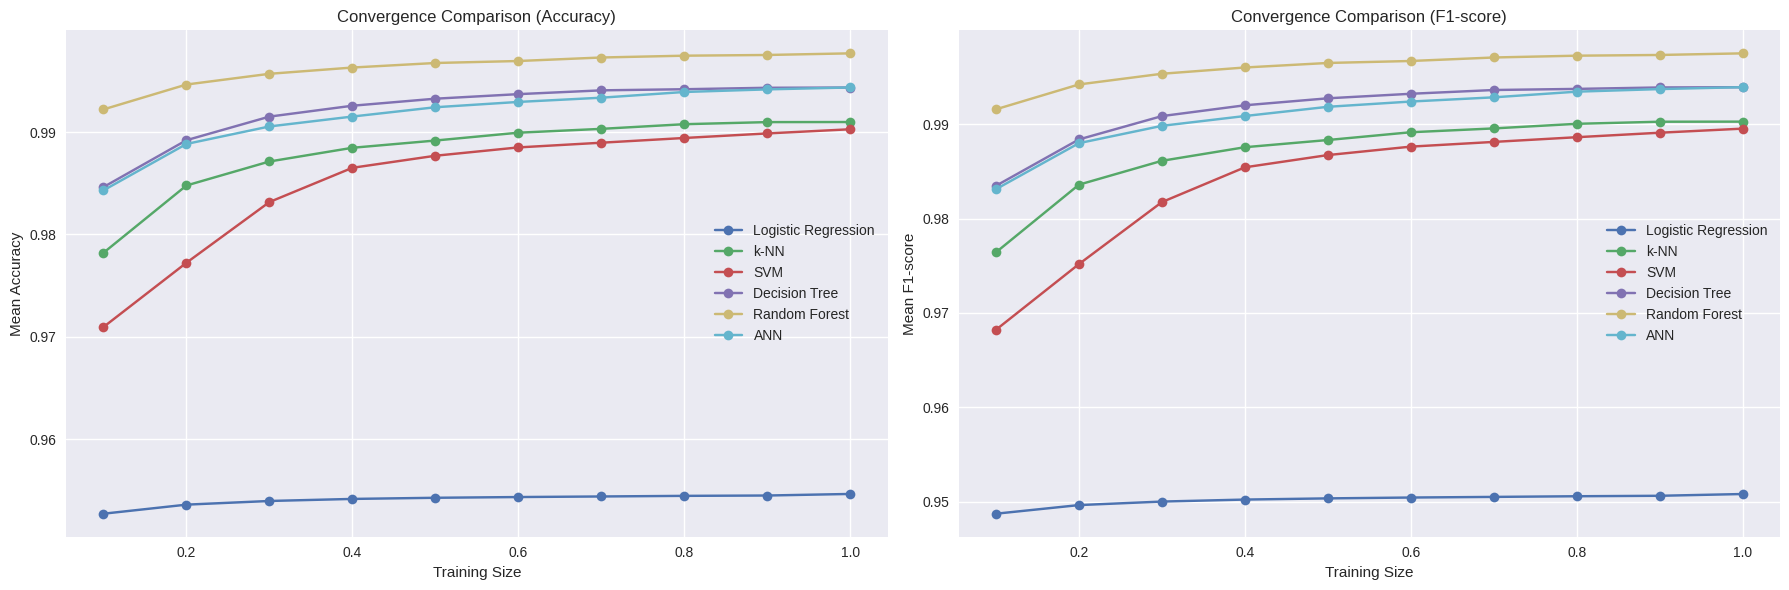

In [15]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# === 1. GRAFICO ACCURACY ===
ax = axes[0]

for model_name, acc_dict in results_accuracy.items():
    ax.plot(
        training_sizes,
        [acc_dict[size] for size in training_sizes],
        marker='o',
        label=model_name
    )

ax.set_title("Convergence Comparison (Accuracy)")
ax.set_xlabel("Training Size")
ax.set_ylabel("Mean Accuracy")
ax.grid(True)
ax.legend()

# === 2. GRAFICO F1-SCORE ===
ax = axes[1]

for model_name, f1_dict in results_f1.items():
    ax.plot(
        training_sizes,
        [f1_dict[size] for size in training_sizes],
        marker='o',
        label=model_name
    )

ax.set_title("Convergence Comparison (F1-score)")
ax.set_xlabel("Training Size")
ax.set_ylabel("Mean F1-score")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
